In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster

In [2]:
zip_file_path=r'C:\Users\mahdi\Documents\jupyter-notebook\data_science_course\test\time_series\archive (4).zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    test_file, train_file=zip_ref.namelist()
    zip_ref.extractall()
os.remove(zip_file_path)

In [3]:
df_test=pd.read_csv(test_file)

In [45]:
df.head()

,y,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df=pd.read_csv(train_file)

In [6]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


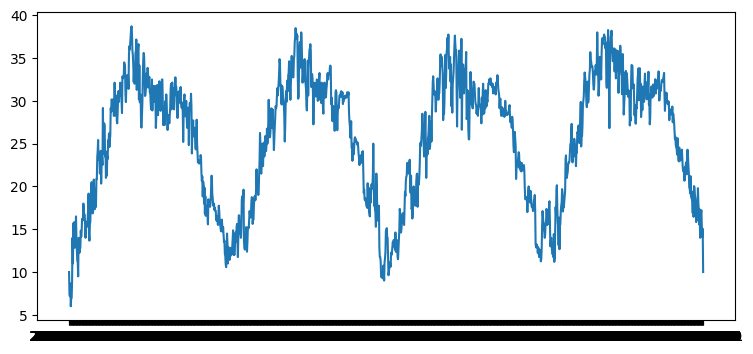

In [8]:
fig, ax= plt.subplots(figsize=(9, 4))
ax.plot(df['date'], df['meantemp'])

In [9]:
# df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df = df.set_index('date')
df = df.rename(columns={'meantemp': 'y'})
df = df.sort_index()

In [10]:
df

,y,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


<Axes: xlabel='date'>

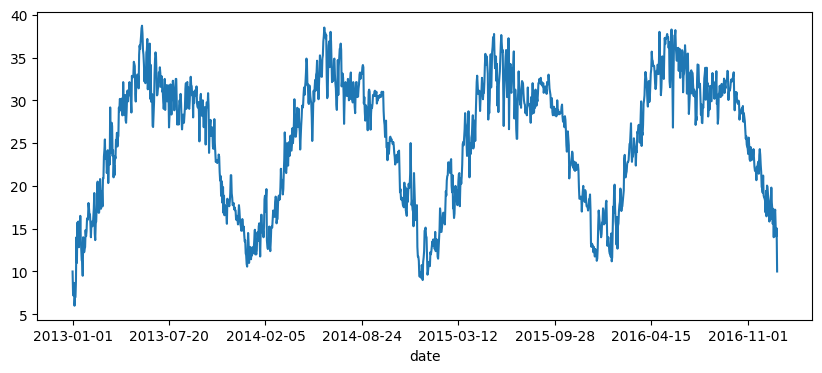

In [11]:
fig, ax= plt.subplots(figsize=(10, 4))
df['y'].plot(ax=ax)

In [12]:
adfuller(df['y']) 

(-2.021069055920666,
 0.27741213723016334,
 10,
 1451,
 {'1%': -3.4348647527922824,
  '5%': -2.863533960720434,
  '10%': -2.567831568508802},
 5423.895746470952)

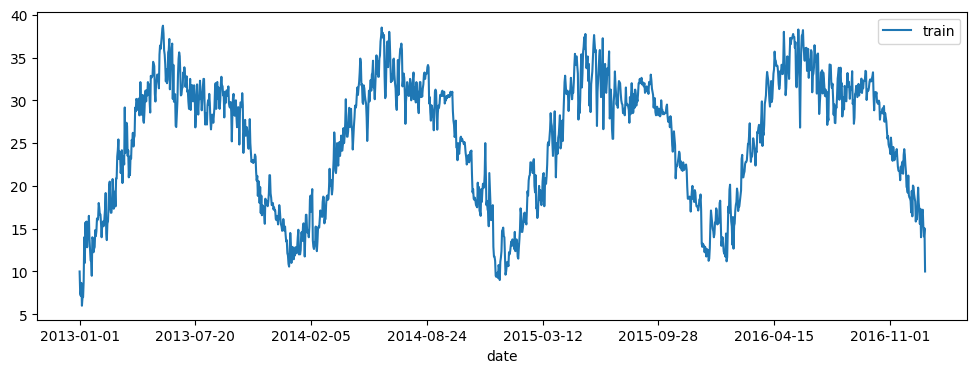

In [14]:
fig, ax=plt.subplots(figsize=(12, 4))
df['y'].plot(ax=ax, label='train')
# data_test['y'].plot(ax=ax, label='test')
ax.legend();

In [37]:
regressor=RandomForestRegressor(max_depth=3, n_estimators=500,random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 200
             )

forecaster.fit(y=df['y'])
forecaster

C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(max_depth=3, n_estimators=500, random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200] 
Transformer for y: None 
Transformer for exog: None 
Window size: 200 
Weight 

In [19]:
df_test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [38]:
predictions = forecaster.predict(114)

C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


In [41]:
predictions.info()

<class 'pandas.core.series.Series'>
RangeIndex: 114 entries, 200 to 313
Series name: pred
Non-Null Count  Dtype  
--------------  -----  
114 non-null    float64
dtypes: float64(1)
memory usage: 1.0 KB


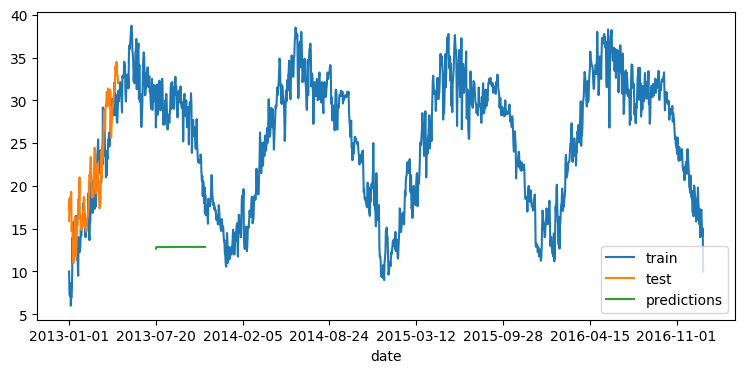

In [40]:
fig, ax = plt.subplots(figsize=(9, 4))
df['y'].plot(ax=ax, label='train')
df_test['meantemp'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend();

In [35]:
steps = 114
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12
             )

lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = df['y'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(df)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 12.


lags grid:   0%|          | 0/2 [00:00<?, ?it/s]

params grid:   0%|          | 0/6 [00:00<?, ?it/s]

C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\utils.py:1197: UserWarning: `last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\utils.py:1135: UserWarning: Series has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
C:\Users\mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\skforecast\utils\uti

KeyError: "None of [Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19,\n       ...\n       47, 48, 49, 50, 51, 52, 53, 54, 55, 56],\n      dtype='int64', length=731)] are in the [index]"

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX